1.we try to maximize the margin distance |x2-x1|=2/||W||

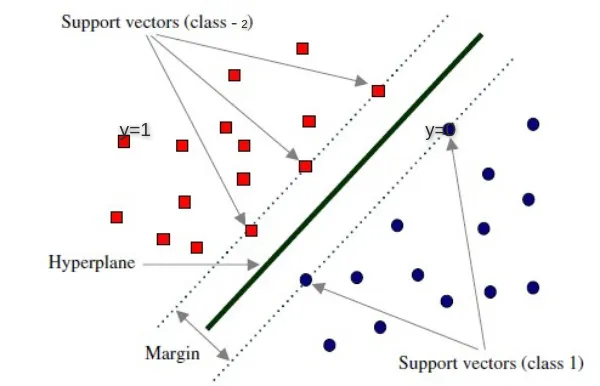

In [ ]:
import numpy as np                 #for data generation and visualization
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification, make_circles, make_moons
import seaborn as sns

In [ ]:
# Generating datasets
X1, y1 = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=56)
X2, y2 = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)
X3, y3 = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=37)
X4, y4 = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=42)
X5, y5 = make_moons(n_samples=200, noise=0.2, random_state=30)
X6, y6 = make_classification(n_samples=200, n_features=2, n_classes=2,
                             n_clusters_per_class=1, n_redundant=0, random_state=70)


In [ ]:
# thought of scaling the data but the data requires no scaling as values are not much greater
# def std(x):
#     mean_x = np.mean(x)
#     variance = sum((x - mean_x) ** 2) / len(x)
#     return variance ** 0.5

# def standard_scaler(x):
#     x = x.astype(float)
#     scaled_x=np.zeros(x.shape)
#     for i in range(x.shape[1]):
#         col_mean = np.mean(x[:, i])
#         col_std = std(x[:, i])

#         if col_std == 0:
#             continue
#         else:
#             scaled_x[:, i] = (x[:, i] - col_mean) / col_std

#     return scaled_x

In [ ]:
# Convert labels to {-1,1}
datasets = [(X1, y1), (X2, y2), (X3, y3), (X4, y4), (X5, y5), (X6, y6)]
datasets = [(X, np.where(y == 0, -1, 1)) for X, y in datasets]

In [ ]:
# here we are splitting the data
split_ratio = 0.8
split_index = int(len(X1) * split_ratio)
train_sets = [(X[:split_index], y[:split_index]) for X, y in datasets]
test_sets=[(X[split_index:], y[split_index:]) for X, y in datasets]

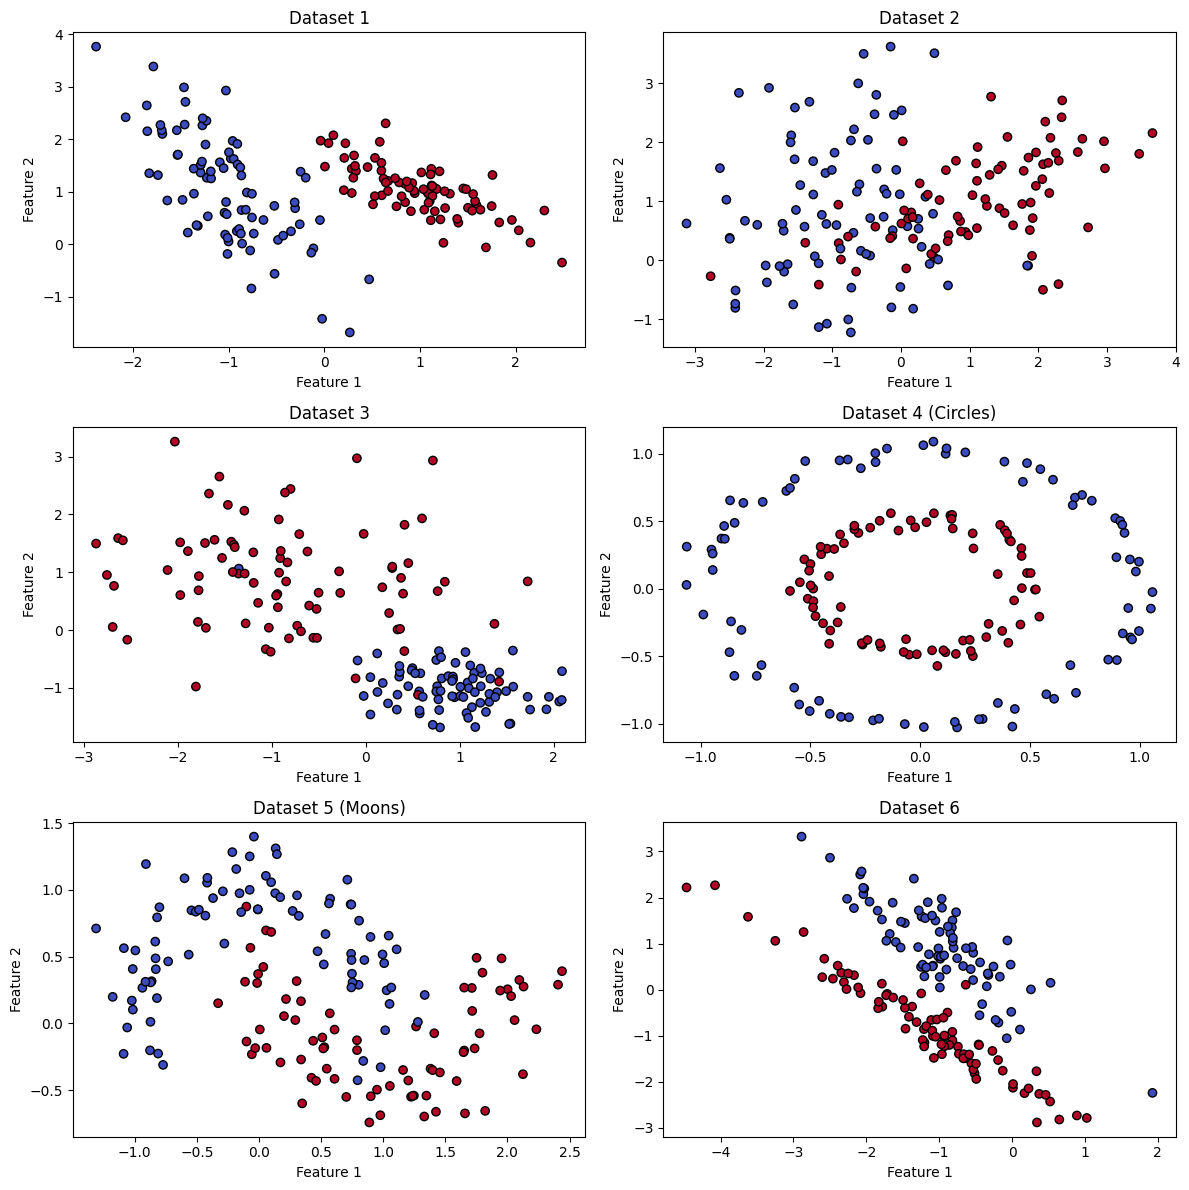

In [ ]:
# Plot all six datasets in a 3x2 grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
titles = ["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4 (Circles)", "Dataset 5 (Moons)", "Dataset 6"]

for i, ax in enumerate(axes.flat):
    X_train, y_train = train_sets[i]
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()


In [ ]:
len(train_sets)         # as there are 6 datasets

6

In [ ]:
train_sets[0][0],train_sets[0][1]       #train_sets[0][0]----x_train and train_sets[0][1] ------y_train for dataset 1

(array([[ 0.94534372,  0.97164601],
        [-0.81060201,  0.98524503],
        [ 1.59149196,  0.74327889],
        [-0.34864149,  0.24651344],
        [ 0.60035808,  0.93159703],
        [ 0.66761562,  1.20532956],
        [ 2.03308845,  0.26426454],
        [-1.36396617,  0.9629137 ],
        [-1.22956447,  1.26567392],
        [-1.09341031,  1.56098737],
        [-0.95878415,  1.96756389],
        [-1.27562707,  2.26381471],
        [ 0.64081875,  2.3024519 ],
        [ 1.40114322,  0.41003751],
        [ 0.91939316,  1.16388213],
        [-1.01296848, -0.18524878],
        [-1.48297521,  0.84515076],
        [ 1.11841383,  1.43669113],
        [-0.48493849,  0.08230222],
        [-0.86617559,  0.6504309 ],
        [ 2.30106885,  0.64202849],
        [ 0.52766516,  0.91592938],
        [-1.53610699,  1.70027692],
        [-1.42806848,  0.22137895],
        [-1.2325927 ,  2.35136926],
        [-1.85157321,  2.15275804],
        [-0.04587048,  0.45991929],
        [ 1.82936388,  0.414

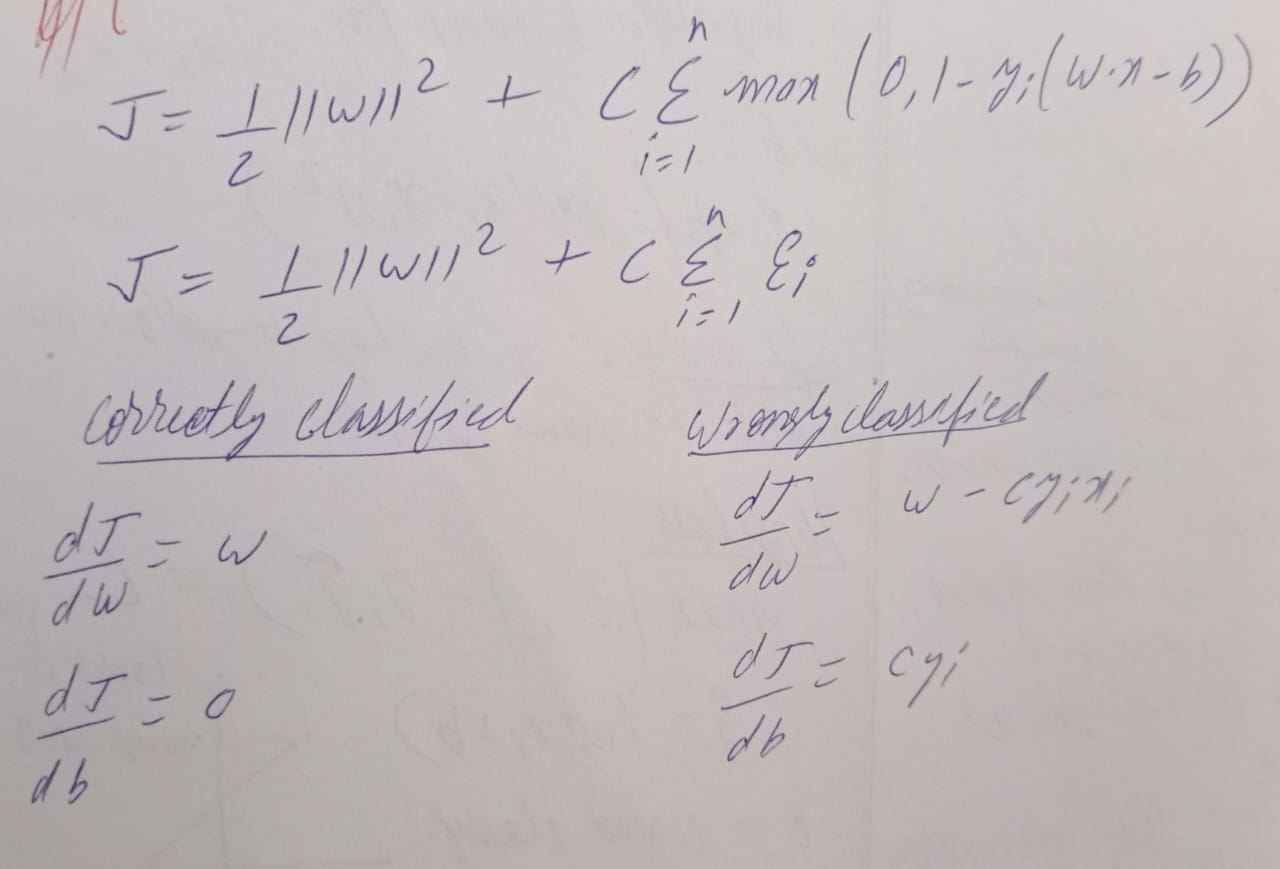

In [ ]:
class SVC:
    def __init__(self, learning_rate,c, epochs):
        self.lr = learning_rate
        self.c=c
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X_train, y_train):
        self.w = np.zeros(X_train.shape[1], dtype=float)
        self.b = 0.0

        # Gradient descent
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                if y_train[j] * (np.dot(self.w, X_train.iloc[j]) -self.b) >= 1:
                    dj_dw =  self.w
                    dj_db = 0
                else:
                    dj_dw = self.w - self.c*y_train[j] * X_train.iloc[j]
                    dj_db = self.c*y_train[j]
                self.w -= self.lr * dj_dw
                self.b -= self.lr * dj_db
            #print(f"Epoch {i+1} -\n Weights:\n {self.w},\n Bias: {self.b}")
        print("Finally Weights and Bias are :", self.w, self.b)

    def predict(self, X_test):
        y_pred = np.dot(X_test, self.w) - self.b
        y_true_labels = np.where(y_pred >= 0, 1, -1)
        return y_true_labels

    def plot_decision_boundary(self, X, y, title="SVM Decision Boundary"):
        """
        Plots the decision boundary using a contour plot and highlights class regions.
        """
        if isinstance(X, pd.DataFrame):
            X = X.values  # Convert DataFrame to NumPy array if needed

        # Define the mesh grid
        h = 0.02  # Step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Get model predictions for the grid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot decision boundary
        plt.figure(figsize=(6, 5))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
        plt.title(title)
        plt.xlabel("$x_1$")
        plt.ylabel("$x_2$")
        plt.show()


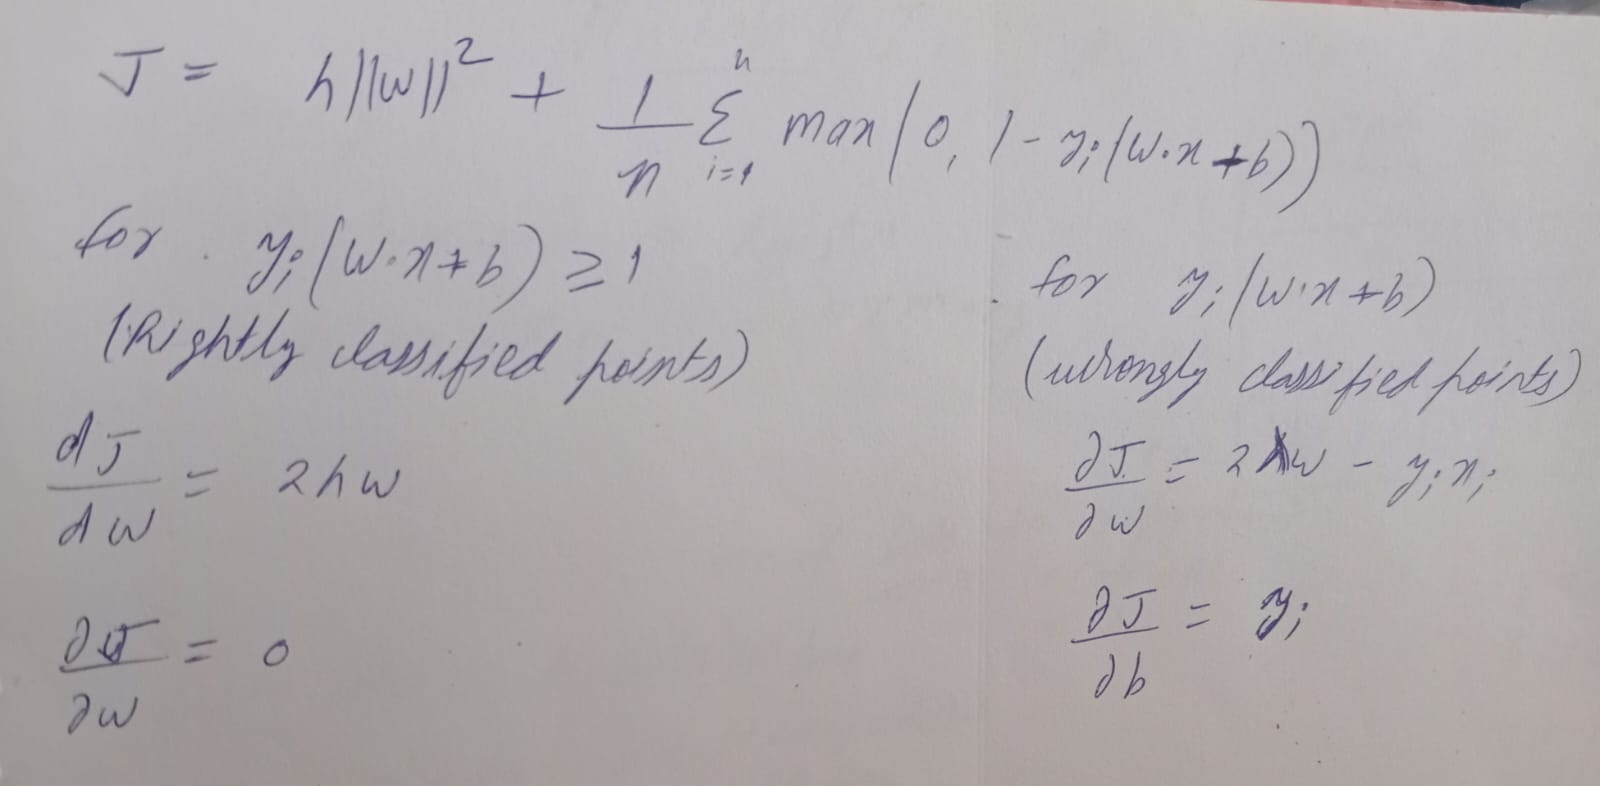

In [ ]:
class SVC:
    def __init__(self, learning_rate, lambda_value, epochs):
        self.lr = learning_rate
        self.lambda_value = lambda_value
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X_train, y_train):
        self.w = np.zeros(X_train.shape[1], dtype=float)
        self.b = 0.0

        # Gradient descent
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                if y_train[j] * (np.dot(self.w, X_train[j]) - self.b) >= 1:
                    dj_dw = 2 * self.lambda_value * self.w
                    dj_db = 0
                else:
                    dj_dw = 2 * self.lambda_value * self.w - y_train[j] * X_train[j]
                    dj_db = y_train[j]
                self.w -= self.lr * dj_dw
                self.b -= self.lr * dj_db
            #print(f"Epoch {i+1} -\n Weights:\n {self.w},\n Bias: {self.b}")
        print("Finally Weights and Bias are :", self.w, self.b)

    def predict(self, X_test):
        y_pred = np.dot(X_test, self.w) - self.b
        y_true_labels = np.where(y_pred >= 0, 1, -1)
        return y_true_labels

    def plot_decision_boundary(self, X, y, title="SVM Decision Boundary"):
        """
        Plots the decision boundary using a contour plot and highlights class regions.
        """
        if isinstance(X, pd.DataFrame):
            X = X.values  # Convert DataFrame to NumPy array if needed

        # Define the mesh grid
        h = 0.02  # Step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Get model predictions for the grid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot decision boundary
        plt.figure(figsize=(6, 5))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
        plt.title(title)
        plt.xlabel("$x_1$")
        plt.ylabel("$x_2$")
        plt.show()


In [ ]:
svc1=SVC(0.01,0.01,20)

In [ ]:
#for dataset 1
svc1.fit(pd.DataFrame(train_sets[0][0]),train_sets[0][1])


Finally Weights and Bias are : 0    1.844372
1    0.765606
Name: 0, dtype: float64 0.6300000000000003


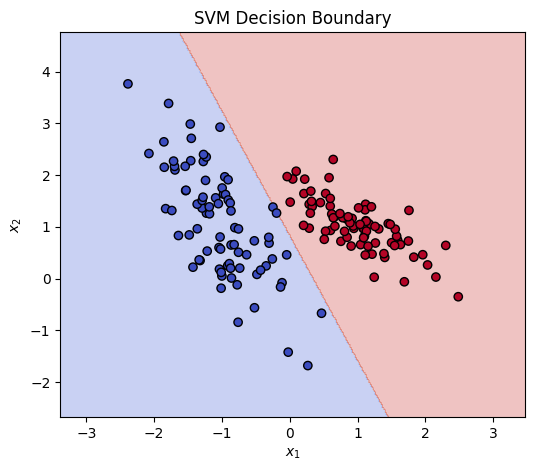

In [ ]:
svc1.plot_decision_boundary(pd.DataFrame(train_sets[0][0]),train_sets[0][1])  #for dataset 1

Finally Weights and Bias are : 0   -1.723945
1   -1.781759
Name: 0, dtype: float64 1.9500000000000015


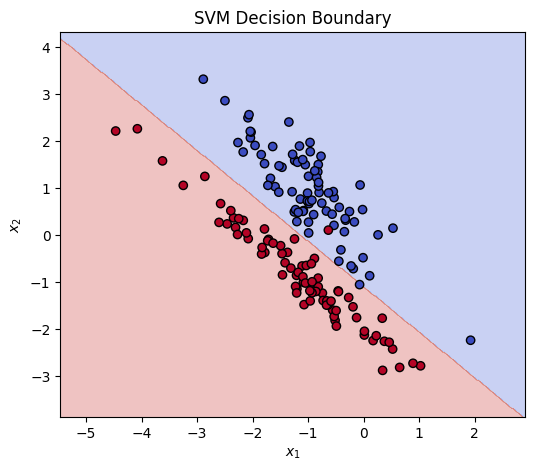

In [ ]:
svc3=SVC(0.01,0.001,20)      #for dataset 6
svc3.fit(pd.DataFrame(train_sets[5][0]),train_sets[5][1])
svc3.plot_decision_boundary(pd.DataFrame(train_sets[5][0]),train_sets[5][1])

Finally Weights and Bias are : 0    0.635454
1   -1.057598
Name: 0, dtype: float64 0.09999999999999996


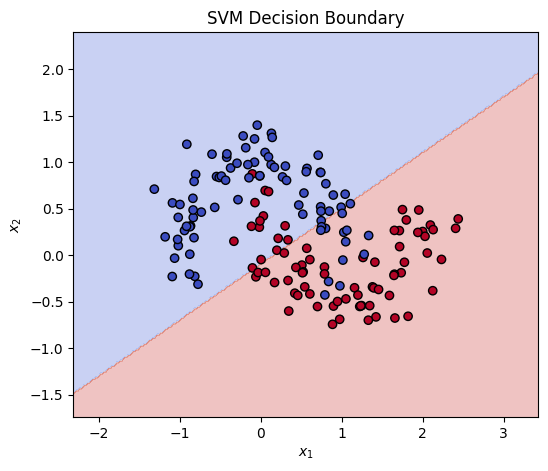

In [ ]:
svc3=SVC(0.01,0.05,20)      #for dataset 5
svc3.fit(pd.DataFrame(train_sets[4][0]),train_sets[4][1])
svc3.plot_decision_boundary(pd.DataFrame(train_sets[4][0]),train_sets[4][1])

Finally Weights and Bias are : 0    0.971890
1   -0.125307
Name: 0, dtype: float64 -0.03


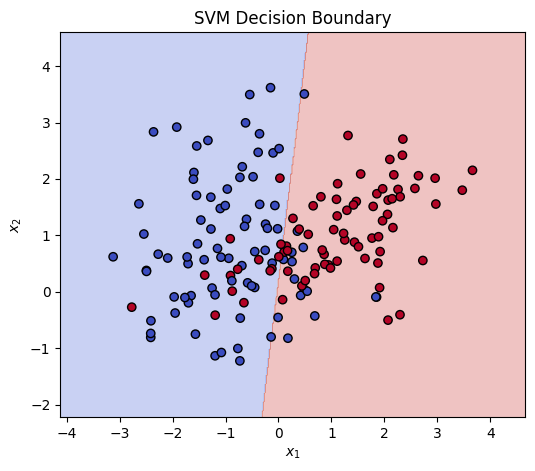

In [ ]:
svc3=SVC(0.01,0.05,20)      #for dataset 3
svc3.fit(pd.DataFrame(train_sets[1][0]),train_sets[1][1])
svc3.plot_decision_boundary(pd.DataFrame(train_sets[1][0]),train_sets[1][1])

Finally Weights and Bias are : 0   -0.249546
1   -0.106763
Name: 0, dtype: float64 0.7500000000000004


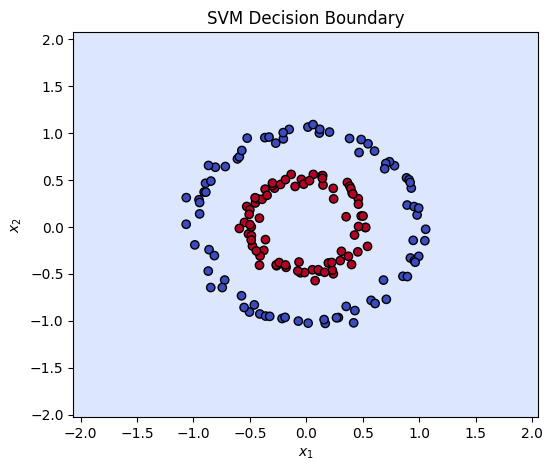

In [ ]:
svc1=SVC(0.01,0.05,20)      #for dataset 3
svc1.fit(pd.DataFrame(train_sets[3][0]),train_sets[3][1])                        #no decision boundary from linear svm
svc1.plot_decision_boundary(pd.DataFrame(train_sets[3][0]),train_sets[3][1])